In [1]:
%load_ext autoreload
%autoreload 2

from PIL import Image
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# DATA IN CODE HERE

monet = None
vangogh = None
dali = None
picasso = None

with open ('monet2.pk', 'rb') as fp:
    monet = pickle.load(fp)
    
with open ('vangogh2.pk', 'rb') as fp:
    vangogh = pickle.load(fp)
    
with open ('dali2.pk', 'rb') as fp:
    dali = pickle.load(fp)
    
with open ('picasso2.pk', 'rb') as fp:
    picasso = pickle.load(fp)
    
    
print(monet[0].shape)
print(vangogh[0].shape)
print(dali[0].shape)
print(picasso[0].shape)

X = np.zeros((3000,256,256,3))
y = np.zeros((3000))

for pic in range(500):
    X[pic] = monet[pic]
    y[pic] = 0
for pic in range(500):
    X[pic + 500] = vangogh[pic]
    y[pic + 500] = 1
for pic in range(500):
    X[pic + 1000] = dali[pic]
    y[pic + 1000] = 2
for pic in range(500):
    X[pic + 1500] = picasso[pic]
    y[pic + 1500] = 3
""""
for pic in range(100):
    X[pic+ 1500] = picasso[pic]
    y[pic + 1500] = 3
"""
#print(X.shape)
#print(y.shape)

seed = np.random.randint(0, 1000)  

np.random.seed(seed)  
np.random.shuffle(X)  
np.random.seed(seed)  
np.random.shuffle(y)

#mean_image = np.mean(X, axis=0)
#X -= mean_image

#X_val = X_val.reshape(num_validation, -1)
y = y.astype(int)

num_train = 1750
num_eval = 150
num_test = 100

print(num_train, num_eval)

X_train = X[range(num_train)]
X_eval = np.zeros((num_eval, 256, 256, 3))
X_test = np.zeros((num_test, 256, 256, 3))
y_train = y[range(num_train)]
y_eval = np.zeros(num_eval).astype(int)
y_test = np.zeros(num_test).astype(int)

for i in range(num_eval):
    X_eval[i] = X[i + num_train]
    y_eval[i] = y[i + num_train]
for i in range(num_test):
    X_test[i] = X[i + num_train + num_eval]
    y_test[i] = y[i + num_train + num_eval]

 

print(X_train.shape)
print(X_eval.shape)
print(X_test.shape)
print(y_train[:10])
print(y_eval[:10])
print(y_test[:10])

#print(X_train[0])

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
1750 150
(1750, 256, 256, 3)
(150, 256, 256, 3)
(100, 256, 256, 3)
[0 0 0 3 1 1 0 0 0 0]
[2 0 2 1 0 2 0 0 0 0]
[1 3 0 0 1 2 1 3 0 0]


In [3]:
#Tensorflow parts we need to change later
model = models.Sequential()
model.add(layers.Conv2D(15, (2, 2), activation='tanh', use_bias=True, input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(30, (2, 2), activation='tanh', use_bias=True))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(45, (2, 2), activation='tanh', use_bias=True))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(60, (2, 2), activation='tanh', use_bias=True))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(75, (2, 2), activation='tanh', use_bias=True))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(90, (2, 2), activation='tanh', use_bias=True))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(105, (2, 2), activation='tanh', use_bias=True))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(120, (2, 2), activation='tanh'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=8, 
                    validation_data=(X_eval, y_eval))

Epoch 1/8
55/55 [==============================] - 27s 495ms/step - loss: 1.0235 - accuracy: 0.5554 - val_loss: 0.8097 - val_accuracy: 0.6733
Epoch 2/8
55/55 [==============================] - 28s 506ms/step - loss: 0.8474 - accuracy: 0.6091 - val_loss: 0.7559 - val_accuracy: 0.6667
Epoch 3/8
55/55 [==============================] - 27s 497ms/step - loss: 0.7753 - accuracy: 0.6451 - val_loss: 0.6987 - val_accuracy: 0.7267
Epoch 4/8
55/55 [==============================] - 27s 490ms/step - loss: 0.7340 - accuracy: 0.6606 - val_loss: 0.6636 - val_accuracy: 0.6800
Epoch 5/8
55/55 [==============================] - 27s 491ms/step - loss: 0.6577 - accuracy: 0.7063 - val_loss: 0.5624 - val_accuracy: 0.7867
Epoch 6/8
55/55 [==============================] - 27s 491ms/step - loss: 0.5919 - accuracy: 0.7440 - val_loss: 0.4998 - val_accuracy: 0.7733
Epoch 7/8
55/55 [==============================] - 27s 490ms/step - loss: 0.5980 - accuracy: 0.7343 - val_loss: 0.6006 - val_accuracy: 0.7333
Epoch 

4/4 - 0s - loss: 0.5048 - accuracy: 0.8100


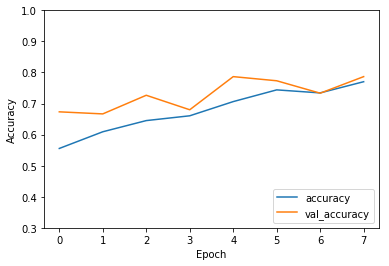

In [4]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

##### 